<a href="https://colab.research.google.com/github/fidelatrstyni/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection**

1.   Template Matching
2.   Edge Detection
3.   Corner Detection
4.   Grid Detection
4.   Contour Detection





In [8]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#Akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Template Matching**
Menggunakan library openCV:

**cv.matchTemplate()**, dengan parameter


*   **Image**: Citra input
*   **Templ**: template dicari, ukurannya tidak boleh lebih besar dari citra input.
*   **method**: metode dari template matching

Jenis metode template matching di OpenCV:
1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED



In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [11]:
template = cv2.imread("/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

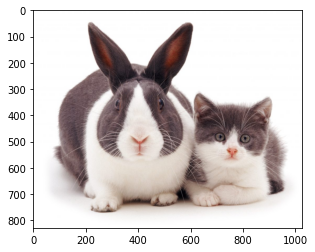

In [ ]:

plt.imshow(img)

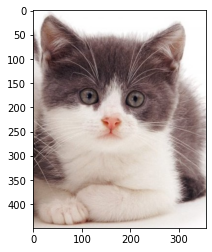

In [12]:
plt.imshow(template)

In [13]:
template.shape

(449, 356, 3)

In [14]:
methods =["cv2.TM_CCOEFF" , "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR" , "cv2.TM_CCORR_NORMED" , "cv2.TM_SQDIFF" , "cv2.TM_SQDIFF_NORMED"]

(597, 305)


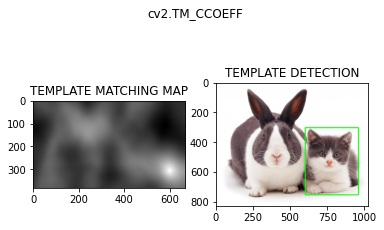





(597, 305)


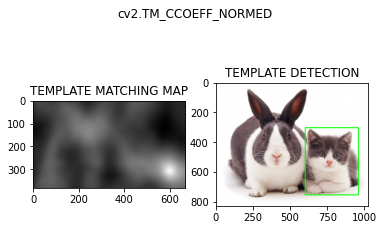





(668, 0)


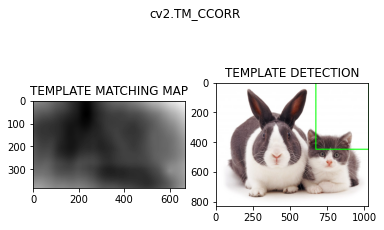





(597, 305)


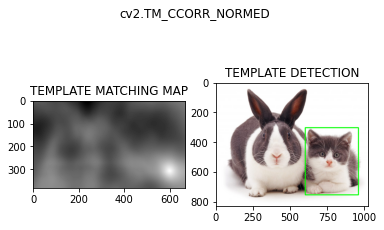





(597, 305)


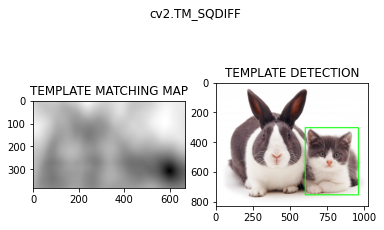





(597, 305)


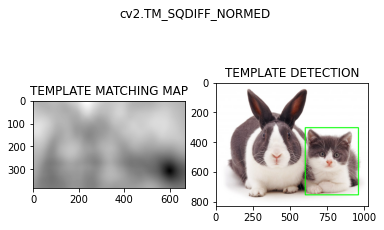

In [15]:
for m in methods:
  img_copy = img.copy()
  method = eval(m)
  res = cv2.matchTemplate(img_copy,template,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  print(top_left)    

  height, width, channels = template.shape  
  bottom_right = (top_left[0]+width, top_left[1]+height)

  cv2.rectangle(img_copy, top_left, bottom_right, (0,255,0),6)

  plt.subplot(121)
  plt.imshow(res, cmap='gray')
  plt.title("TEMPLATE MATCHING MAP")
  plt.subplot(122)
  plt.imshow(img_copy)
  plt.title("TEMPLATE DETECTION")
  plt.suptitle(m)

  plt.show()
  print("\n")
  print("\n")

3. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg, sehingga menghasilkan luaran sebagai berikut:

a. Sobel Edge Detection 

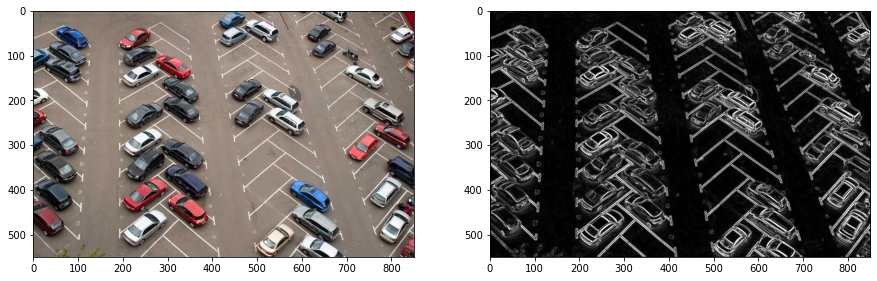

In [16]:
img0 = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg') 

gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

img = cv.GaussianBlur(gray,(3,3),0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))

b. Canny Edge Detection

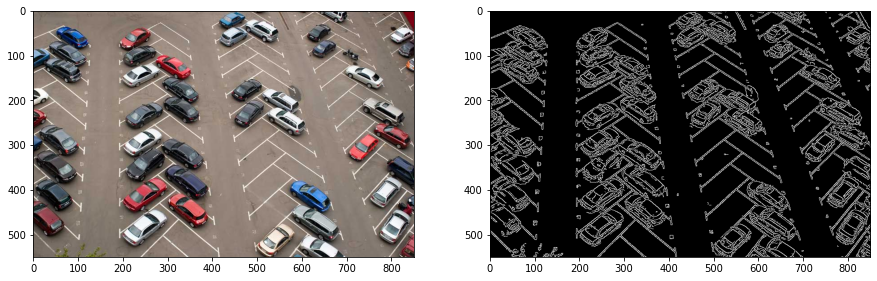

In [17]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg')
edges = cv.Canny(img,100,200)
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show()

c. Laplacian Edge Detection

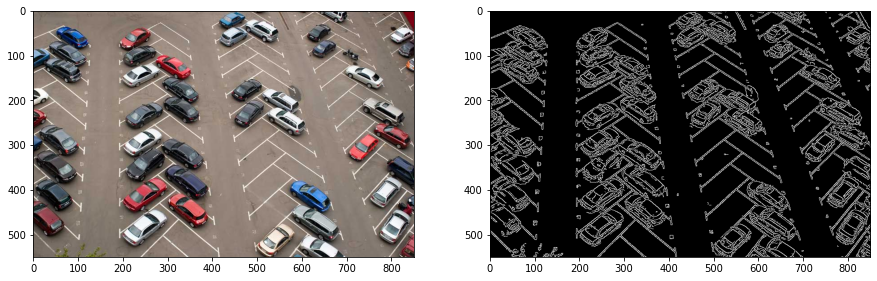

In [18]:
image_original = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg', cv.IMREAD_COLOR)
# Menghapus noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
# Mengurangi noise pada image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter image menggunakan filter2D, yang memiliki input: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# mengkonversi kembali ke uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

4.Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV  dengan  menggunakan  gambar  chess-board.jpg,  sehingga  menghasilkan luaran sebagai berikut: 

a. Harris Corner Detection

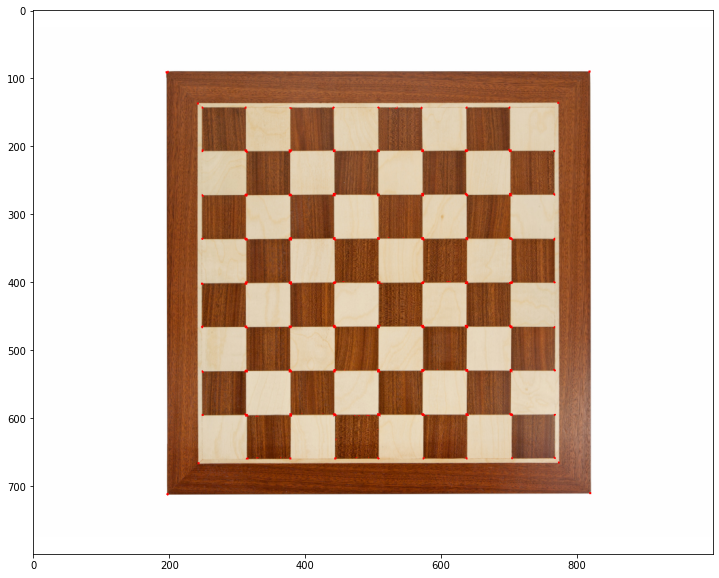

In [20]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

b.Shi-Tomasi Detection

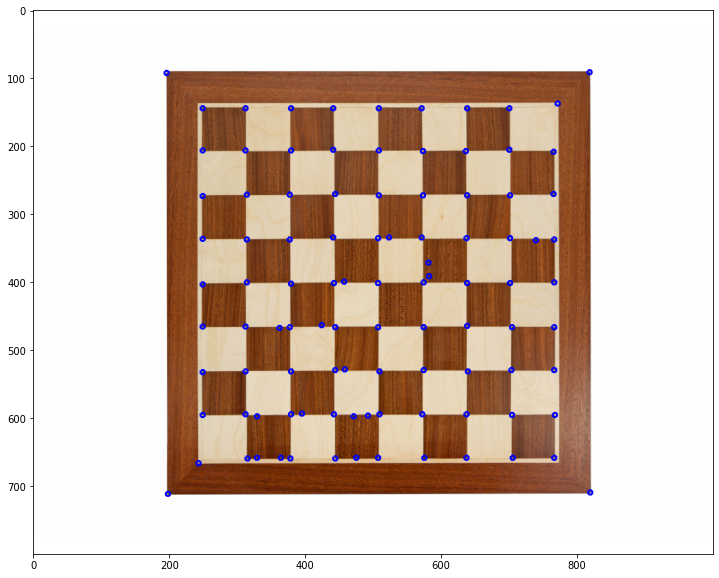

In [21]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

5. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

Hough Transform SUDOKU

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


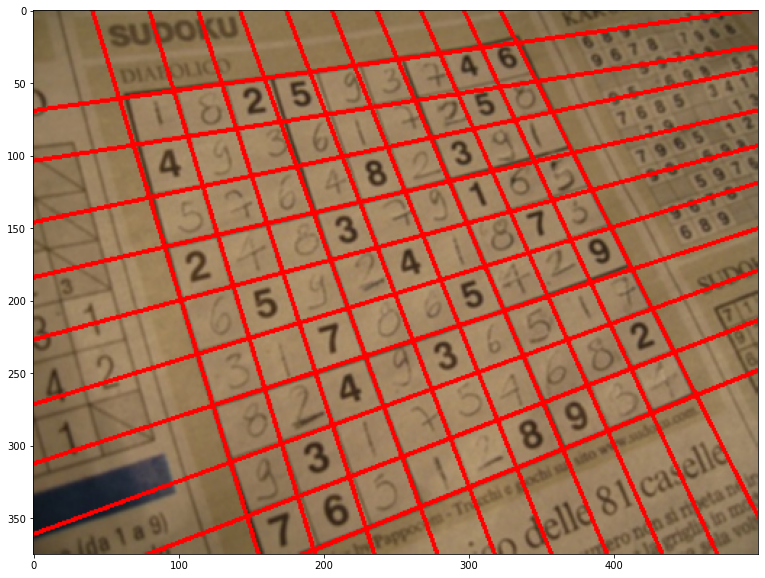

In [22]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

findCountours

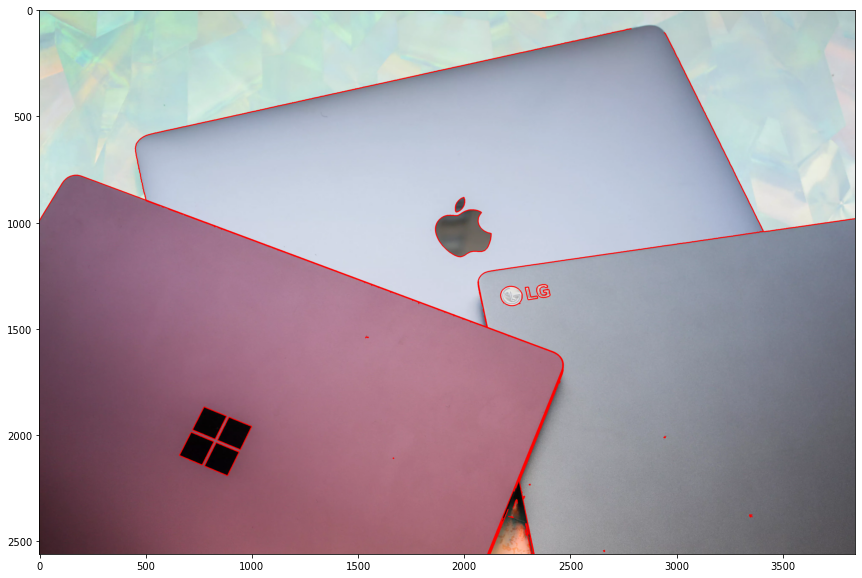

In [23]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))